In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
import csv
from tqdm.notebook import tqdm

In [3]:
work_dir = Path.cwd() # set path to current working directory

In [4]:
files_list = glob(r'../../Data/Caravela/HygroClip2_HC2A/2020/*/'+ '*.dat')  #specify where the data is stored
files_list.sort() # sort the data files into order

li = []

for filename in files_list: #create a list where each element is a datarame from 1 file
    df = pd.read_csv(filename,index_col=False, header=0, sep=';',quoting=csv.QUOTE_NONE,
                     usecols = ['PC Timestamp[UTC]','PC Time Zone','Humidity','Temp'])
    li.append(df)

hc2a = pd.concat(li, axis=0,ignore_index=True) # concatenate the dataframes


In [5]:
hc2a # have a look at the dataframe we created

,PC Timestamp[UTC],PC Time Zone,Humidity,Temp
0,2020/01/15 12:07:06.205,00:00:00,--.--,--.--
1,2020/01/15 12:07:07.224,00:00:00,--.--,--.--
2,2020/01/15 12:07:08.222,00:00:00,65.860,27.580
3,2020/01/15 12:07:09.216,00:00:00,65.810,27.580
4,2020/01/15 12:07:10.231,00:00:00,65.810,27.580
...,...,...,...,...
2205620,2020/02/18 09:55:56.230,00:00:00,88.84,25.32
2205621,2020/02/18 09:55:57.224,00:00:00,88.79,25.32
2205622,2020/02/18 09:55:58.227,00:00:00,88.79,25.32
2205623,2020/02/18 09:55:59.229,00:00:00,88.63,25.33


Change date time to isoformat

In [6]:
dt = []
for i in tqdm(range(0, len(hc2a['PC Timestamp[UTC]']))):
    dt.append(datetime.strptime(hc2a['PC Timestamp[UTC]'][i], '%Y/%m/%d %H:%M:%S.%f').isoformat())

hc2a['datetime_UTC'] = dt

In [19]:
subset = hc2a[(hc2a['datetime_UTC'] >= '2020-01-22 00:00:00.000')] #select data from Caravela's launch onwards
subset

,PC Timestamp[UTC],PC Time Zone,Humidity,Temp,datetime_UTC
26368,2020/01/22 17:20:07.299,00:00:00,97.09,24.1,2020-01-22T17:20:07.299000
26369,2020/01/22 17:20:08.297,00:00:00,96.89,24.09,2020-01-22T17:20:08.297000
26370,2020/01/22 17:20:09.299,00:00:00,96.76,24.11,2020-01-22T17:20:09.299000
26371,2020/01/22 17:20:10.298,00:00:00,96.6,24.07,2020-01-22T17:20:10.298000
26372,2020/01/22 17:20:11.294,00:00:00,96.48,24.08,2020-01-22T17:20:11.294000
...,...,...,...,...,...
2205620,2020/02/18 09:55:56.230,00:00:00,88.84,25.32,2020-02-18T09:55:56.230000
2205621,2020/02/18 09:55:57.224,00:00:00,88.79,25.32,2020-02-18T09:55:57.224000
2205622,2020/02/18 09:55:58.227,00:00:00,88.79,25.32,2020-02-18T09:55:58.227000
2205623,2020/02/18 09:55:59.229,00:00:00,88.63,25.33,2020-02-18T09:55:59.229000


In [20]:
#  check all time zones are utc
subset['PC Time Zone'].unique()

array(['00:00:00'], dtype=object)

In [21]:
subset = subset.drop(['PC Timestamp[UTC]', 'PC Time Zone'],axis=1) # remove the colums we dont need

In [22]:
subset

,Humidity,Temp,datetime_UTC
26368,97.09,24.1,2020-01-22T17:20:07.299000
26369,96.89,24.09,2020-01-22T17:20:08.297000
26370,96.76,24.11,2020-01-22T17:20:09.299000
26371,96.6,24.07,2020-01-22T17:20:10.298000
26372,96.48,24.08,2020-01-22T17:20:11.294000
...,...,...,...
2205620,88.84,25.32,2020-02-18T09:55:56.230000
2205621,88.79,25.32,2020-02-18T09:55:57.224000
2205622,88.79,25.32,2020-02-18T09:55:58.227000
2205623,88.63,25.33,2020-02-18T09:55:59.229000


We need to turn the ' --.--' entries into something python friendly. Below we define a function to do this

In [23]:
def get_better_value(value):
    """Create readable output for the given variable from hygroclip input"""
    if isinstance(value, float):
        #nothing to do
        return value
    elif value == ' --.--':
        return np.nan
    else:
        return float(value)

In [24]:
orig_temp = subset['Temp'].to_numpy() #apply bad entry clean up to temperature

#Go through every element in list and use function to convert
better_temp = [get_better_value(i) for i in orig_temp]

better_temp[:5]

[24.1, 24.09, 24.11, 24.07, 24.08]

In [27]:
orig_hum = subset['Humidity'].to_numpy() #apply bad entry clean up to humidity

#Go through every element in list and use function to convert
better_hum = [get_better_value(i) for i in orig_hum]

better_hum[:5]

[97.09, 96.89, 96.76, 96.6, 96.48]

In [34]:
subset['Humidity'] = better_hum
subset['Temp'] = better_temp

In [35]:
subset.to_csv('../../Products/CARAVELA_Hygroclip.csv',index = None)#save file

# Check saved file

In [36]:
baa = pd.read_csv('../../Products/CARAVELA_Hygroclip.csv')# import file to test it

In [37]:
baa

,Humidity,Temp,datetime_UTC
0,97.09,24.10,2020-01-22T17:20:07.299000
1,96.89,24.09,2020-01-22T17:20:08.297000
2,96.76,24.11,2020-01-22T17:20:09.299000
3,96.60,24.07,2020-01-22T17:20:10.298000
4,96.48,24.08,2020-01-22T17:20:11.294000
...,...,...,...
2179252,88.84,25.32,2020-02-18T09:55:56.230000
2179253,88.79,25.32,2020-02-18T09:55:57.224000
2179254,88.79,25.32,2020-02-18T09:55:58.227000
2179255,88.63,25.33,2020-02-18T09:55:59.229000


In [38]:
x=[] # parse the timestamp
for i in tqdm(range(len(baa['datetime_UTC']))):
    x.append(datetime.fromisoformat(baa['datetime_UTC'][i]))
baa['datetime_parsed'] = x

Text(0.5, 0, 'Date')

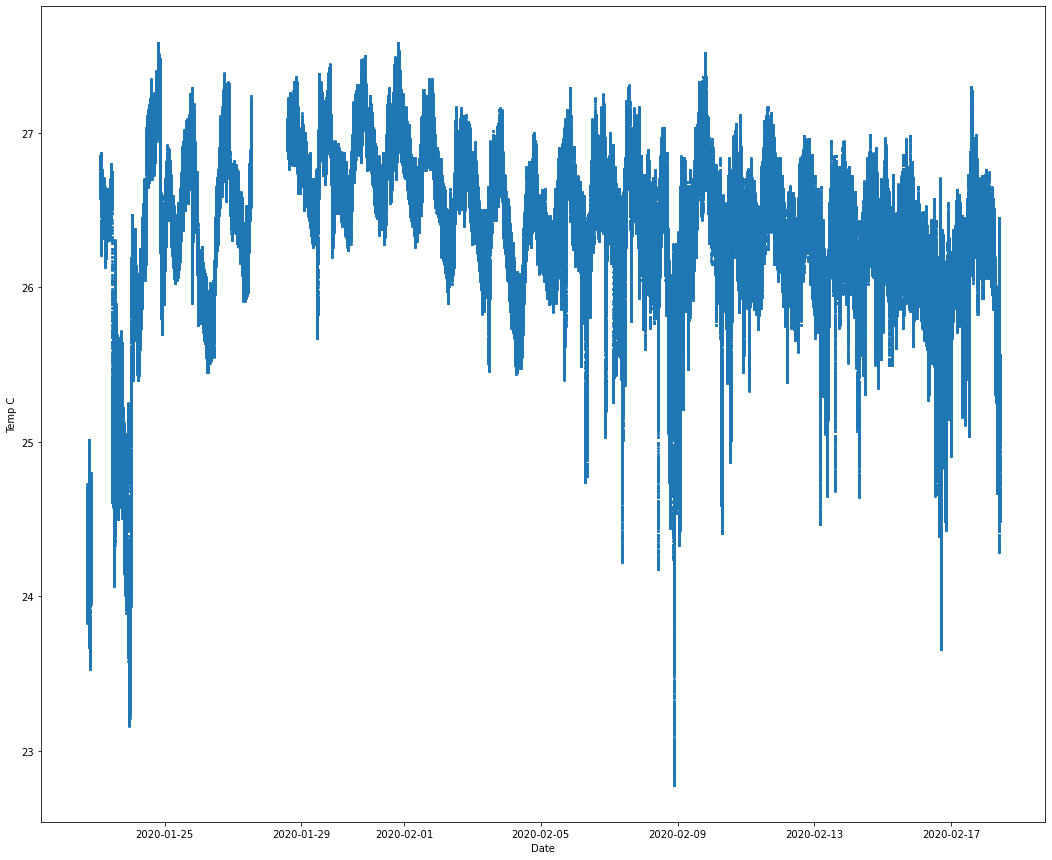

In [42]:
fig,ax = plt.subplots(1,1, figsize=(18, 15), sharex=True)
ax.scatter(baa['datetime_parsed'], baa['Temp'],s=4)
ax.set_ylabel('Temp C')
ax.set_xlabel('Date')